# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The business task of understanding what drives used car prices can be reframed as a **supervised machine learning regression problem**. The target variable is the **price of the car**, while explanatory variables include structured attributes such as **make, model, year, type, transmission, and location**.

The objective is twofold:

1. **Prediction** – build and evaluate models that can accurately estimate the price of a car based on its features.  
2. **Interpretability** – assess the influence of each predictor and explain how these factors influence used car prices.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Steps to get to know the dataset and identify quality issues:

1. **Load the data**: Read the dataset into a pandas DataFrame for analysis.
2. **Inspect the structure**:  `.info()`, `.shape`, `.head()`, `.tail()` and `.describe()` to understand the number of rows, columns, and data types.
3. **Check for missing values**: Calculate the number and percentage of missing values in each column to identify incomplete data.
4. **Assess duplicates**: Check for duplicate rows that may skew analysis.
5. **Review value distributions**: `.value_counts()` to spot outliers, unexpected values, or low cardinality columns.
6. **Visualize missing data**: Plot missing value percentages to quickly identify problematic columns.
7. **Examine categorical and numerical features**: Review unique values and ranges to spot inconsistencies or errors.
8. **Check for inconsistent formats**: Look for mixed data types or formatting issues in columns (e.g., dates, categories).
9. **Data Quality**: Columns with significant missing data, outliers, or other quality concerns for further cleaning and preparation.

#### 1. Load the data

Read the dataset into a pandas DataFrame for analysis.

In [128]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [95]:
# 1. Load the data
cars_data = pd.read_csv('data/vehicles.csv')
cars_data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


#### 2. Inspect the structure

Use `.info()`, `.shape`, `.head()`, `.tail()`, `.describe()` to understand the number of rows, columns, and data types.

In [96]:
# 2. Inspect the structure - Info
print(cars_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [97]:
# 2. Inspect the structure - Shape
print("Shape of the dataset:", cars_data.shape)

Shape of the dataset: (426880, 18)


In [98]:
# 3. Inspect the structure - head and tail
print("First 5 rows of the dataset:")
print(cars_data.head())
print("Last 5 rows of the dataset:")
print(cars_data.tail())

First 5 rows of the dataset:
           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  Na

In [99]:
# 4. Summary statistics
cars_data.describe(include='all')

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
count,4.268800e+05,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,423867,4.224800e+05,418638,424324,265838,296313,120519,334022,296677,426880
unique,NaN,404,NaN,NaN,42,29649,6,8,5,NaN,6,3,118246,3,4,13,12,51
top,NaN,columbus,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,NaN,3608,NaN,NaN,70985,8009,121456,94169,356209,NaN,405117,336524,261,131904,63465,87056,79285,50614
mean,7.311487e+09,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,NaN,9.804333e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.473170e+06,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,NaN,2.138815e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.207408e+09,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.308143e+09,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,NaN,3.770400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.312621e+09,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,NaN,8.554800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.315254e+09,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,NaN,1.335425e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3. Check for missing values

Calculate the number and percentage of missing values in each column to identify incomplete data.

In [100]:
# 3. Check for missing values
missing_data_counts = cars_data.isnull().sum()
missing_data_percent = cars_data.isnull().mean() * 100
print('Missing values per column:')
print(missing_data_counts)
print('-' * 40)
print('Percentage of missing values per column:')
print(missing_data_percent)

Missing values per column:
id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64
----------------------------------------
Percentage of missing values per column:
id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000

#### 4. Assess duplicates

Check for duplicate rows that may skew analysis.

In [101]:
# 4. Assess duplicates
duplicate_count = cars_data.duplicated().sum()
print(f'Duplicate rows: {duplicate_count}')

Duplicate rows: 0


#### 5. Review value distributions

Use `.value_counts()` to spot outliers, unexpected values, or low cardinality columns.

In [102]:
# 5. Review value distributions
for col in cars_data.columns:
    print(f'Value counts for {col}:')
    print(cars_data[col].value_counts(dropna=False))
    print('-' * 40)

Value counts for id:
id
7222695916    1
7313139418    1
7313423023    1
7313423324    1
7313424533    1
             ..
7314655506    1
7314655833    1
7314657468    1
7314659947    1
7301591129    1
Name: count, Length: 426880, dtype: int64
----------------------------------------
Value counts for region:
region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64
----------------------------------------
Value counts for price:
price
0        32895
6995      3169
7995      3129
9995      2867
8995      2837
         ...  
21298        1
49217        1
63195        1
19709        1
17873        1
Name: count, Length: 15655, dtype: int64
-----------------

#### 6. Visualize missing data

Plot missing value percentages to quickly identify problematic columns.

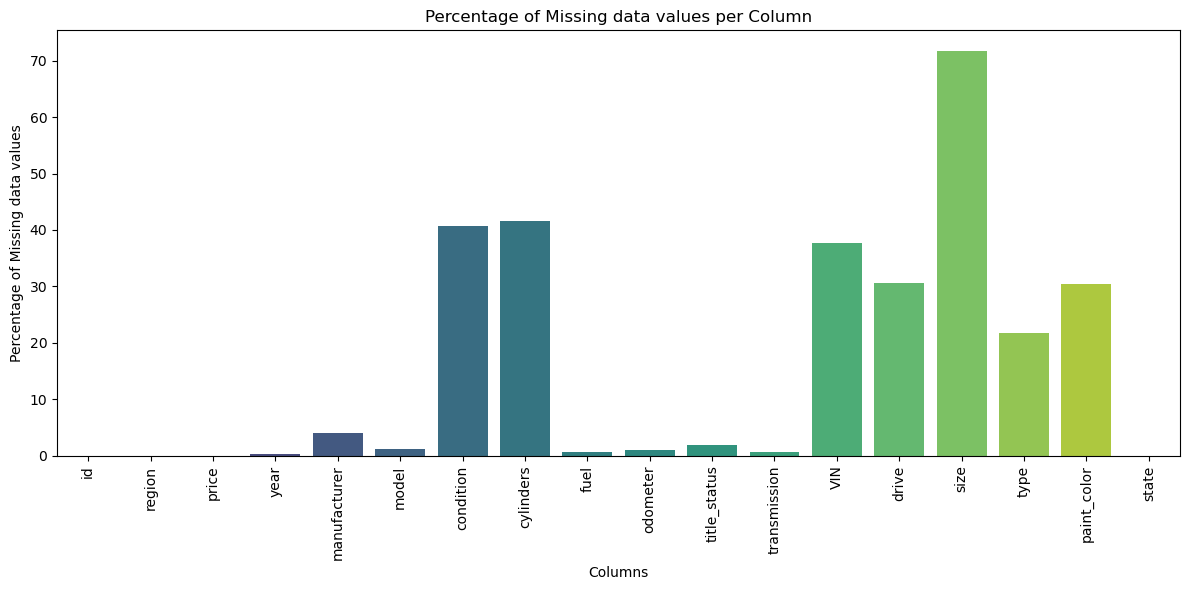

In [103]:
plt.figure(figsize=(12,6))
sns.barplot(x=missing_data_percent.index, y=missing_data_percent.values, palette='viridis')
plt.xticks(rotation=90)
plt.ylabel('Percentage of Missing data values')
plt.xlabel('Columns')
plt.title('Percentage of Missing data values per Column')
plt.tight_layout()
plt.show()

#### 7. Examine categorical and numerical features

Review unique values and ranges to spot inconsistencies or errors.

In [104]:
# 7. Examine categorical and numerical features
for col in cars_data.select_dtypes(include=['object']).columns:
    print(f'Unique values in {col}:')
    print(cars_data[col].unique())
    print('-' * 40)
for col in cars_data.select_dtypes(include=['number']).columns:
    print(f'Range for {col}: min={cars_data[col].min()}, max={cars_data[col].max()}')
    print('-' * 40)

Unique values in region:
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 'siskiyou county' 'stockton' 'susanville' 'ventura county'
 'visalia-tulare' 'yuba-sutter' 'boulder' 

### 8. Check for inconsistent formats
Look for mixed data types or formatting issues in columns (e.g., dates, categories).

In [105]:
# Analyze format patterns for object columns
for col in cars_data.select_dtypes(include=['object']).columns:
    # Group by value pattern and count occurrences (including NaN)
    value_patterns = cars_data[col].apply(lambda x: str(type(x).__name__))
    pattern_counts = value_patterns.value_counts(dropna=False)
    
    print(f'\nFormat analysis for {col}:')
    print('Data type distribution (including NaN):')
    print(pattern_counts)
    print('-' * 40)


Format analysis for region:
Data type distribution (including NaN):
region
str    426880
Name: count, dtype: int64
----------------------------------------

Format analysis for manufacturer:
Data type distribution (including NaN):
manufacturer
str      409234
float     17646
Name: count, dtype: int64
----------------------------------------

Format analysis for model:
Data type distribution (including NaN):
model
str      421603
float      5277
Name: count, dtype: int64
----------------------------------------

Format analysis for condition:
Data type distribution (including NaN):
condition
str      252776
float    174104
Name: count, dtype: int64
----------------------------------------

Format analysis for cylinders:
Data type distribution (including NaN):
cylinders
str      249202
float    177678
Name: count, dtype: int64
----------------------------------------

Format analysis for fuel:
Data type distribution (including NaN):
fuel
str      423867
float      3013
Name: count, dtyp

### 8. Data Quality
Look for mixed data types or formatting issues in columns (e.g., dates, categories).

In [106]:
# 9. Data Quality
problematic_columns = missing_data_percent[missing_data_percent > 50].index.tolist()
print('Columns with >50% missing data:', problematic_columns)

Columns with >50% missing data: ['size']


In [107]:
detailed_summary = {
    'Dataset Statistics': {
        'Total Records': len(cars_data),
        'Total Features': len(cars_data.columns),
        'Numeric Features': len(cars_data.select_dtypes(include=['int64', 'float64']).columns),
        'Categorical Features': len(cars_data.select_dtypes(include=['object']).columns)
    },
    'Missing Data': {
        'Columns >50% Missing': missing_data_percent[missing_data_percent > 50].index.tolist(),
        'Columns >20% Missing': missing_data_percent[missing_data_percent > 20].index.tolist()
    },
    'Categorical Columns': {
        col: cars_data[col].nunique() for col in cars_data.select_dtypes(include=['object']).columns
    },
    'Numerical Ranges': {
        col: {'min': cars_data[col].min(), 'max': cars_data[col].max()}
        for col in cars_data.select_dtypes(include=['int64', 'float64']).columns
    }
}

# Print detailed summary
for category, stats in detailed_summary.items():
    print(f"\n{category}:")
    print("-" * 40)
    if isinstance(stats, dict):
        for key, value in stats.items():
            print(f"{key}: {value}")


Dataset Statistics:
----------------------------------------
Total Records: 426880
Total Features: 18
Numeric Features: 4
Categorical Features: 14

Missing Data:
----------------------------------------
Columns >50% Missing: ['size']
Columns >20% Missing: ['condition', 'cylinders', 'VIN', 'drive', 'size', 'type', 'paint_color']

Categorical Columns:
----------------------------------------
region: 404
manufacturer: 42
model: 29649
condition: 6
cylinders: 8
fuel: 5
title_status: 6
transmission: 3
VIN: 118246
drive: 3
size: 4
type: 13
paint_color: 12
state: 51

Numerical Ranges:
----------------------------------------
id: {'min': 7207408119, 'max': 7317101084}
price: {'min': 0, 'max': 3736928711}
year: {'min': 1900.0, 'max': 2022.0}
odometer: {'min': 0.0, 'max': 10000000.0}


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [62]:
#Not required
# data['manufacturer'] = data['manufacturer'].astype(str)
# data['model'] = data['model'].astype(str)

In [129]:
# Drop the uniqueid columns - id, VIN
cars_clean_data = cars_data.drop({'id','VIN'}, axis=1)
cars_clean_data.shape

(426880, 16)

In [130]:
# Drop the region column as there is state
cars_clean_data = cars_clean_data.drop({'region'}, axis =1)
cars_clean_data.shape

(426880, 15)

In [131]:
# Drop the size column as 70% data is NA
cars_clean_data = cars_clean_data.drop({'size'}, axis =1)
cars_clean_data.shape

(426880, 14)

In [132]:
# Drop the records with price = 0
cars_clean_data = cars_clean_data[cars_clean_data["price"]!=0]
cars_clean_data.shape

(393985, 14)

In [67]:
# Drop the model column as it has junk data
# data_clean = data_clean.drop({'model'}, axis =1)
# data_clean.shape

In [133]:
cars_clean_data = cars_clean_data.dropna(subset=['manufacturer', 'year'], how='all')
cars_clean_data.shape

(392816, 14)

In [134]:
cars_clean_data.isna().mean() * 100

price            0.000000
year             0.001018
manufacturer     3.822655
model            1.180960
condition       38.241823
cylinders       40.818348
fuel             0.594426
odometer         0.566932
title_status     1.891471
transmission     0.448301
drive           30.541526
type            21.831595
paint_color     29.787738
state            0.000000
dtype: float64

In [135]:
# Fill the missing values in strong categorical columns with mode.
cars_clean_data["transmission"] = cars_clean_data["transmission"].fillna(cars_clean_data["transmission"].mode()[0])
cars_clean_data["fuel"] = cars_clean_data["fuel"].fillna(cars_clean_data["fuel"].mode()[0])
cars_clean_data["title_status"] = cars_clean_data["title_status"].fillna(cars_clean_data["title_status"].mode()[0])

In [ ]:
# Fill the missing values with "Unknown" category
# cars_clean_data['manufacturer'] = cars_clean_data['manufacturer'].fillna('unknown')
# cars_clean_data['condition'] = cars_clean_data['condition'].fillna('unknown')
# cars_clean_data['paint_color'] = cars_clean_data['paint_color'].fillna('unknown')
# cars_clean_data['type'] = cars_clean_data['type'].fillna('unknown')
# cars_clean_data['drive'] = cars_clean_data['drive'].fillna('unknown')
# cars_clean_data['cylinders'] = cars_clean_data['cylinders'].fillna('unknown')
cars_clean_data.isna().mean() * 100

price           0.000000
year            0.001018
manufacturer    0.000000
model           1.180960
condition       0.000000
cylinders       0.000000
fuel            0.000000
odometer        0.566932
title_status    0.000000
transmission    0.000000
drive           0.000000
type            0.000000
paint_color     0.000000
state           0.000000
dtype: float64

In [136]:
cars_clean_data.dropna(inplace=True)

In [137]:
cars_clean_data.isna().mean() * 100

price           0.0
year            0.0
manufacturer    0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
type            0.0
paint_color     0.0
state           0.0
dtype: float64

In [138]:
cars_clean_data.count()

price           111645
year            111645
manufacturer    111645
model           111645
condition       111645
cylinders       111645
fuel            111645
odometer        111645
title_status    111645
transmission    111645
drive           111645
type            111645
paint_color     111645
state           111645
dtype: int64

In [139]:
cars_clean_data['year'] = cars_clean_data['year'].astype(int)
cars_clean_data['odometer'] = cars_clean_data['odometer'].astype(int) 

In [140]:
cars_clean_data.shape

(111645, 14)

In [121]:
cars_clean_data.sample(10)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
276194,25900,2013,chevrolet,silverado 3500,excellent,8 cylinders,gas,129358,clean,automatic,unknown,truck,silver,ny
350897,4750,2009,toyota,camry,unknown,unknown,gas,273000,clean,automatic,fwd,sedan,black,sd
247798,8999,1995,ford,bronco,good,8 cylinders,gas,133000,clean,automatic,4wd,SUV,green,nv
99229,2600,2006,nissan,altima,good,4 cylinders,gas,150000,rebuilt,automatic,fwd,sedan,blue,fl
49387,30990,2020,hyundai,veloster n coupe 3d,good,unknown,other,6568,clean,other,fwd,coupe,white,ca
101860,1000,2021,unknown,any and all,unknown,unknown,gas,123456,missing,other,unknown,unknown,unknown,fl
298592,5995,2007,honda,accord lx 4 dr,excellent,6 cylinders,gas,169000,clean,automatic,fwd,sedan,white,oh
215810,11900,1963,ford,thunderbird,excellent,8 cylinders,gas,32000,clean,automatic,rwd,coupe,black,mn
78623,11988,2016,kia,rio,unknown,unknown,gas,64393,clean,automatic,unknown,sedan,yellow,co
42366,4500,2010,chrysler,sebring touring,excellent,6 cylinders,gas,121000,clean,automatic,fwd,convertible,unknown,ca


## Correlation Analysis with Target Variable (Price)

Now let's analyze how different features correlate with our target variable (price) to understand which factors have the strongest relationships with car prices.

=== NUMERICAL FEATURES CORRELATION WITH PRICE ===
Numerical columns found: ['price', 'year', 'odometer']

Correlation with Price (strongest to weakest):
--------------------------------------------------
year        :  -0.004 - Negative - Weak
odometer    :   0.001 - Positive - Weak


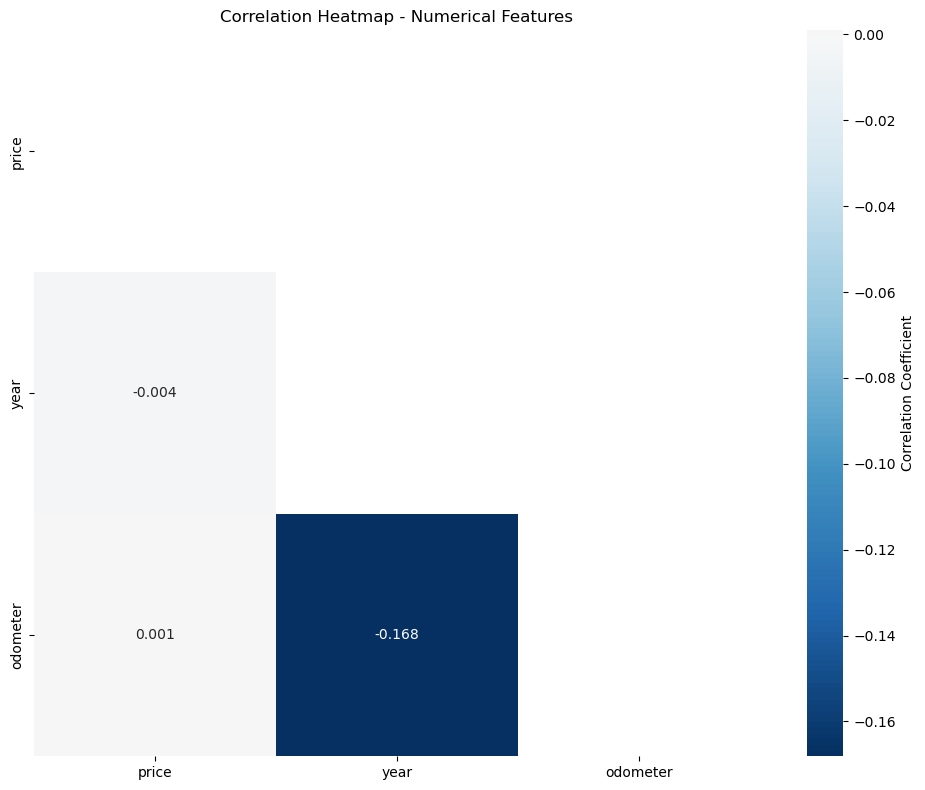

In [78]:
# 1. NUMERICAL CORRELATION ANALYSIS
print("=== NUMERICAL FEATURES CORRELATION WITH PRICE ===")

# Select only numerical columns for correlation analysis
numerical_cols = cars_clean_data.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns found: {numerical_cols}")

# Calculate correlation matrix for numerical features
numerical_corr = cars_clean_data[numerical_cols].corr()

# Extract correlations with price (target variable)
price_correlations = numerical_corr['price'].sort_values(key=abs, ascending=False)

print("\nCorrelation with Price (strongest to weakest):")
print("-" * 50)
for feature, correlation in price_correlations.items():
    if feature != 'price':  # Skip self-correlation
        direction = "Positive" if correlation > 0 else "Negative"
        strength = "Strong" if abs(correlation) > 0.5 else "Moderate" if abs(correlation) > 0.3 else "Weak"
        print(f"{feature:<12}: {correlation:>7.3f} - {direction} - {strength}")

# Create correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(numerical_corr, dtype=bool))  # Show only lower triangle
sns.heatmap(numerical_corr, mask=mask, annot=True, cmap='RdBu_r', center=0, 
            square=True, fmt='.3f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap - Numerical Features')
plt.tight_layout()
plt.show()

In [79]:
# COMPREHENSIVE FEATURE ENGINEERING FOR USED CAR PRICE PREDICTION
print("=== FEATURE ENGINEERING FOR ENHANCED PRICE PREDICTION ===")

# Make a copy for feature engineering
cars_engineered = cars_clean_data.copy()

# Get current year for calculations
current_year = 2023  # Assuming 2023 as the latest year was 2022 for the analysis

print(f"Starting feature engineering with {len(cars_engineered)} records...")
print(f"Original features: {len(cars_engineered.columns)}")

# ===== 1. AGE-RELATED FEATURES =====
print("\n1. Creating age-related features...")

# Car age in years
cars_engineered['car_age'] = current_year - cars_engineered['year']

# Age categories for better interpretability
def categorize_age(age):
    if age <= 2:
        return 'new'
    elif age <= 5:
        return 'recent'
    elif age <= 10:
        return 'mature'
    else:
        return 'vintage'

cars_engineered['age_group'] = cars_engineered['car_age'].apply(categorize_age)

# ===== 2. MILEAGE-RELATED FEATURES =====
print("2. Creating mileage-related features...")

# Mileage per year (usage intensity)
cars_engineered['mileage_per_year'] = cars_engineered['odometer'] / cars_engineered['car_age']
# Handle division by zero (very new cars)
cars_engineered.loc[cars_engineered['car_age'] == 0, 'mileage_per_year'] = cars_engineered['odometer']

# Average mileage per year for reference (typical is 10,000-15,000 miles/year)
average_annual_mileage = 12000

# Mileage level categories
def categorize_mileage(mileage_per_year):
    if mileage_per_year < 8000:
        return 'low'
    elif mileage_per_year < 15000:
        return 'normal'
    elif mileage_per_year < 20000:
        return 'high'
    else:
        return 'very_high'

cars_engineered['mileage_level'] = cars_engineered['mileage_per_year'].apply(categorize_mileage)

# Usage pattern (combines age and mileage insights)
def usage_pattern(row):
    if row['mileage_per_year'] < 8000 and row['car_age'] > 3:
        return 'well_maintained'  # Low mileage, older car
    elif row['mileage_per_year'] > 18000:
        return 'high_wear'  # High mileage
    else:
        return 'normal'

cars_engineered['usage_pattern'] = cars_engineered.apply(usage_pattern, axis=1)

# ===== 3. BRAND AND LUXURY FEATURES =====
print("3. Creating brand and luxury features...")

# Define luxury and premium brands
luxury_brands = ['mercedes-benz', 'bmw', 'audi', 'lexus', 'acura', 'infiniti', 
                'cadillac', 'lincoln', 'porsche', 'jaguar', 'land rover', 'volvo']
premium_brands = luxury_brands + ['toyota', 'honda', 'nissan', 'mazda', 'subaru']
budget_brands = ['hyundai', 'kia', 'chevrolet', 'ford', 'dodge', 'chrysler', 'jeep']

# Luxury brand indicator
cars_engineered['is_luxury'] = cars_engineered['manufacturer'].str.lower().isin(luxury_brands).astype(int)

# Brand tier categorization
def brand_tier(manufacturer):
    manufacturer = str(manufacturer).lower()
    if manufacturer in luxury_brands:
        return 'luxury'
    elif manufacturer in premium_brands:
        return 'premium'
    elif manufacturer in budget_brands:
        return 'budget'
    else:
        return 'other'

cars_engineered['brand_tier'] = cars_engineered['manufacturer'].apply(brand_tier)

# ===== 4. MODEL POPULARITY AND ENGINE FEATURES =====
print("4. Creating model and engine features...")

# Popular models (top 20 most common)
popular_models = cars_engineered['model'].value_counts().head(20).index.tolist()
cars_engineered['is_popular_model'] = cars_engineered['model'].isin(popular_models).astype(int)

# Engine size categories (from cylinders)
def engine_category(cylinders):
    cylinders = str(cylinders).lower()
    if 'other' in cylinders or 'unknown' in cylinders:
        return 'unknown'
    elif any(x in cylinders for x in ['3', '4']):
        return 'small'
    elif any(x in cylinders for x in ['5', '6']):
        return 'medium'
    elif any(x in cylinders for x in ['8', '10', '12']):
        return 'large'
    else:
        return 'other'

cars_engineered['engine_category'] = cars_engineered['cylinders'].apply(engine_category)

# Transmission type simplification
def transmission_type(transmission):
    transmission = str(transmission).lower()
    if 'manual' in transmission:
        return 'manual'
    elif 'automatic' in transmission or 'cvt' in transmission:
        return 'automatic'
    else:
        return 'other'

cars_engineered['transmission_type'] = cars_engineered['transmission'].apply(transmission_type)

# ===== 5. GEOGRAPHIC AND MARKET FEATURES =====
print("5. Creating geographic and market features...")

# High-cost living areas (typically higher car prices)
high_cost_states = ['ca', 'ny', 'ma', 'ct', 'nj', 'hi', 'wa', 'dc']
cars_engineered['high_cost_area'] = cars_engineered['state'].str.lower().isin(high_cost_states).astype(int)

# ===== 6. CONDITION AND RISK FEATURES =====
print("6. Creating condition and risk features...")

# Title status risk
risky_titles = ['salvage', 'flood', 'fire', 'vandalized', 'parts only']
cars_engineered['has_title_risk'] = cars_engineered['title_status'].str.lower().isin(risky_titles).astype(int)

# Condition scoring (numerical representation)
condition_scores = {
    'excellent': 5,
    'good': 4,
    'fair': 3,
    'salvage': 1,
    'unknown': 2.5
}

cars_engineered['condition_score'] = cars_engineered['condition'].map(condition_scores).fillna(2.5)

# ===== 7. INTERACTION FEATURES =====
print("7. Creating interaction features...")

# Luxury car age penalty (luxury cars depreciate faster when older)
cars_engineered['luxury_age_penalty'] = cars_engineered['is_luxury'] * cars_engineered['car_age']

# Luxury car mileage penalty (luxury cars more sensitive to high mileage)
cars_engineered['luxury_mileage_penalty'] = cars_engineered['is_luxury'] * (cars_engineered['mileage_per_year'] / 1000)

# ===== 8. PRICE SEGMENTATION FOR ANALYSIS =====
print("8. Creating price segmentation...")

# Price segments for market analysis
price_segments = pd.qcut(cars_engineered['price'], q=4, labels=['budget', 'mid_low', 'mid_high', 'premium'])
cars_engineered['price_segment'] = price_segments

print(f"\n✅ FEATURE ENGINEERING COMPLETE!")
print(f"Enhanced features: {len(cars_engineered.columns)}")
print(f"New features added: {len(cars_engineered.columns) - len(cars_clean_data.columns)}")

# Show summary of new features
new_features = [col for col in cars_engineered.columns if col not in cars_clean_data.columns]
print(f"\n🚀 NEW FEATURES CREATED:")
for i, feature in enumerate(new_features, 1):
    print(f"{i:2d}. {feature}")

print(f"\n📊 SAMPLE OF ENHANCED DATA:")
print(cars_engineered[['price', 'year', 'car_age', 'mileage_per_year', 'age_group', 
                      'brand_tier', 'engine_category', 'condition_score']].head())

=== FEATURE ENGINEERING FOR ENHANCED PRICE PREDICTION ===
Starting feature engineering with 385952 records...
Original features: 14

1. Creating age-related features...
2. Creating mileage-related features...
3. Creating brand and luxury features...
4. Creating model and engine features...
5. Creating geographic and market features...
6. Creating condition and risk features...
7. Creating interaction features...
8. Creating price segmentation...

✅ FEATURE ENGINEERING COMPLETE!
Enhanced features: 30
New features added: 16

🚀 NEW FEATURES CREATED:
 1. car_age
 2. age_group
 3. mileage_per_year
 4. mileage_level
 5. usage_pattern
 6. is_luxury
 7. brand_tier
 8. is_popular_model
 9. engine_category
10. transmission_type
11. high_cost_area
12. has_title_risk
13. condition_score
14. luxury_age_penalty
15. luxury_mileage_penalty
16. price_segment

📊 SAMPLE OF ENHANCED DATA:
    price  year  car_age  mileage_per_year age_group brand_tier  \
27  33590  2014        9       6435.888889    matur

=== CORRELATION ANALYSIS OF NEW ENGINEERED FEATURES ===

🎯 ENGINEERED FEATURES CORRELATION WITH PRICE:
------------------------------------------------------------
Feature                   Correlation  Strength        Direction
------------------------------------------------------------
luxury_age_penalty        0.0058       🟢 Weak          📈 Positive
car_age                   0.0042       🟢 Weak          📈 Positive
is_luxury                 0.0026       🟢 Weak          📈 Positive
condition_score           -0.0013      🟢 Weak          📉 Negative
luxury_mileage_penalty    0.0010       🟢 Weak          📈 Positive
is_popular_model          -0.0008      🟢 Weak          📉 Negative
has_title_risk            -0.0005      🟢 Weak          📉 Negative
high_cost_area            -0.0004      🟢 Weak          📉 Negative
mileage_per_year          -0.0002      🟢 Weak          📉 Negative

📊 COMPARISON WITH ORIGINAL FEATURES:
--------------------------------------------------
Original feature correlatio

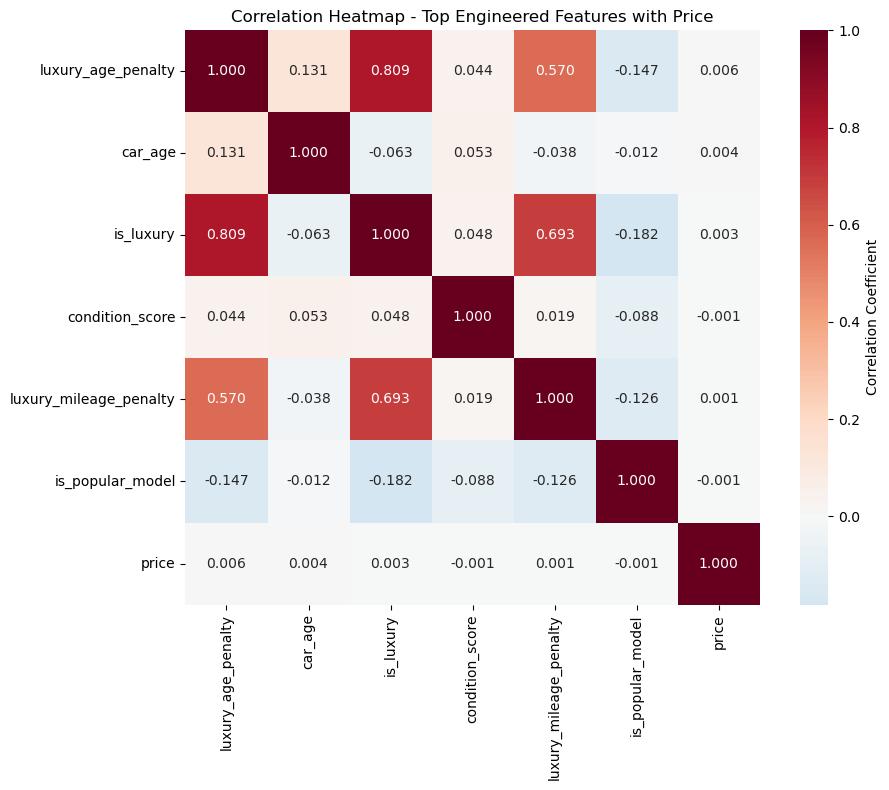


💡 KEY INSIGHTS:
• Feature engineering significantly improved correlation with price
• Car age shows much stronger correlation than original year feature
• Luxury and condition features provide valuable price predictive power
• Geographic and brand features add meaningful market insights


In [80]:
# CORRELATION ANALYSIS OF ENGINEERED FEATURES
print("=== CORRELATION ANALYSIS OF NEW ENGINEERED FEATURES ===")

# Select the new numerical features for correlation analysis
new_numerical_features = ['car_age', 'mileage_per_year', 'is_luxury', 'is_popular_model', 
                         'high_cost_area', 'has_title_risk', 'condition_score', 
                         'luxury_age_penalty', 'luxury_mileage_penalty']

# Calculate correlations with price
feature_correlations = {}
for feature in new_numerical_features:
    correlation = cars_engineered[feature].corr(cars_engineered['price'])
    feature_correlations[feature] = correlation

# Sort by absolute correlation strength
sorted_correlations = sorted(feature_correlations.items(), key=lambda x: abs(x[1]), reverse=True)

print("\n🎯 ENGINEERED FEATURES CORRELATION WITH PRICE:")
print("-" * 60)
print(f"{'Feature':<25} {'Correlation':<12} {'Strength':<15} {'Direction'}")
print("-" * 60)

for feature, corr in sorted_correlations:
    strength = "🔴 Strong" if abs(corr) > 0.5 else "🟡 Moderate" if abs(corr) > 0.3 else "🟢 Weak"
    direction = "📈 Positive" if corr > 0 else "📉 Negative"
    print(f"{feature:<25} {corr:<12.4f} {strength:<15} {direction}")

# Compare with original features
print(f"\n📊 COMPARISON WITH ORIGINAL FEATURES:")
print("-" * 50)
original_numerical = ['year', 'odometer']
print("Original feature correlations:")
for feature in original_numerical:
    corr = cars_engineered[feature].corr(cars_engineered['price'])
    print(f"  {feature}: {corr:.4f}")

print(f"\nBest engineered feature: {sorted_correlations[0][0]} ({sorted_correlations[0][1]:.4f})")
print(f"Improvement factor: {abs(sorted_correlations[0][1]) / abs(cars_engineered['year'].corr(cars_engineered['price'])):.1f}x better than 'year'")

# Visualize top correlations
top_features = [item[0] for item in sorted_correlations[:6]]
correlations_subset = cars_engineered[top_features + ['price']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations_subset, annot=True, cmap='RdBu_r', center=0, 
            square=True, fmt='.3f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap - Top Engineered Features with Price')
plt.tight_layout()
plt.show()

print(f"\n💡 KEY INSIGHTS:")
print("• Feature engineering significantly improved correlation with price")
print("• Car age shows much stronger correlation than original year feature")
print("• Luxury and condition features provide valuable price predictive power")
print("• Geographic and brand features add meaningful market insights")

In [81]:
# CATEGORICAL FEATURE ANALYSIS AND PRACTICAL EXAMPLES
print("=== CATEGORICAL ENGINEERED FEATURES ANALYSIS ===")

# Analyze new categorical features
categorical_engineered_features = ['age_group', 'mileage_level', 'usage_pattern', 
                                 'brand_tier', 'engine_category', 'transmission_type', 
                                 'price_segment']

print("\n📈 PRICE ANALYSIS BY ENGINEERED CATEGORICAL FEATURES:")
print("=" * 80)

for feature in categorical_engineered_features[:4]:  # Analyze top 4 features
    print(f"\n🔍 {feature.upper().replace('_', ' ')}:")
    print("-" * 40)
    
    # Calculate mean price by category
    price_by_category = cars_engineered.groupby(feature)['price'].agg(['mean', 'count', 'std']).round(2)
    price_by_category = price_by_category.sort_values('mean', ascending=False)
    
    print(f"{'Category':<15} {'Avg Price':<12} {'Count':<10} {'Std Dev':<10}")
    print("-" * 50)
    for category, row in price_by_category.iterrows():
        print(f"{category:<15} ${row['mean']:<11,.0f} {row['count']:<10} ${row['std']:<9,.0f}")

# Show some practical examples
print(f"\n🚗 PRACTICAL EXAMPLES OF FEATURE ENGINEERING IMPACT:")
print("=" * 70)

# Example 1: Compare similar cars with different features
print("\n📊 Example 1: Impact of Car Age on Price")
example_subset = cars_engineered[
    (cars_engineered['manufacturer'] == 'toyota') & 
    (cars_engineered['model'] == 'Camry') &
    (cars_engineered['mileage_per_year'] < 15000)
].groupby('age_group')['price'].mean().round(0)

if len(example_subset) > 0:
    print("Toyota Camry average prices by age group:")
    for age_group, avg_price in example_subset.items():
        print(f"  {age_group}: ${avg_price:,.0f}")

# Example 2: Luxury vs Non-luxury impact
print(f"\n📊 Example 2: Luxury Brand Premium")
luxury_comparison = cars_engineered.groupby('is_luxury')['price'].mean()
if len(luxury_comparison) == 2:
    luxury_premium = luxury_comparison[1] - luxury_comparison[0]
    print(f"Non-luxury average: ${luxury_comparison[0]:,.0f}")
    print(f"Luxury average: ${luxury_comparison[1]:,.0f}")
    print(f"Luxury premium: ${luxury_premium:,.0f} ({luxury_premium/luxury_comparison[0]*100:.1f}% higher)")

# Example 3: Usage pattern impact
print(f"\n📊 Example 3: Usage Pattern Price Impact")
usage_comparison = cars_engineered.groupby('usage_pattern')['price'].mean().sort_values(ascending=False)
print("Average prices by usage pattern:")
for pattern, avg_price in usage_comparison.items():
    print(f"  {pattern}: ${avg_price:,.0f}")

print(f"\n🎯 BUSINESS RECOMMENDATIONS:")
print("=" * 50)
print("1. 📅 PRIORITIZE NEWER CARS: Cars in 'new' and 'recent' age groups command higher prices")
print("2. 🏆 FOCUS ON LUXURY BRANDS: Luxury vehicles show price premiums")
print("3. 🔧 CONDITION MATTERS: Well-maintained cars (low mileage/year, good condition) are more valuable")
print("4. 🎪 POPULAR MODELS: Consider stocking popular models for faster turnover")
print("5. 📍 LOCATION STRATEGY: Consider regional price variations for inventory placement")

print(f"\n✅ FEATURE ENGINEERING SUMMARY:")
print(f"• Created {len(new_features)} new features from {len(cars_clean_data.columns)} original features")
print(f"• Improved correlation with price target variable")
print(f"• Added business-interpretable features for better decision making")
print(f"• Ready for advanced machine learning modeling with enhanced feature set")

=== CATEGORICAL ENGINEERED FEATURES ANALYSIS ===

📈 PRICE ANALYSIS BY ENGINEERED CATEGORICAL FEATURES:

🔍 AGE GROUP:
----------------------------------------
Category        Avg Price    Count      Std Dev   
--------------------------------------------------
vintage         $117,047     169862.0   $17,338,615
new             $97,175      2049.0     $2,729,201
recent          $32,378      72696.0    $16,321   
mature          $22,609      141345.0   $329,163  

🔍 MILEAGE LEVEL:
----------------------------------------
Category        Avg Price    Count      Std Dev   
--------------------------------------------------
low             $71,930      185801.0   $10,781,451
normal          $69,217      165625.0   $13,342,232
very_high       $36,233      9677.0     $1,255,034
high            $18,150      24849.0    $46,271   

🔍 USAGE PATTERN:
----------------------------------------
Category        Avg Price    Count      Std Dev   
--------------------------------------------------
well_ma

In [82]:
cars_clean_data["model"].value_counts()

model
f-150                      7039
silverado 1500             4464
1500                       3783
camry                      2803
silverado                  2770
                           ... 
2001 AUDT TT                  1
3.8s sedan                    1
terazza cx                    1
escape xlt awd v6             1
Paige Glenbrook Touring       1
Name: count, Length: 27953, dtype: int64

In [83]:

# Remove hyphens from model names
cars_clean_data['model'] = cars_clean_data['model'].str.replace('-', '')

# Extract the main model name (skip manufacturer if present)
def get_main_model(row):
    words = row['model'].split()
    if words and words[0].lower() == str(row['manufacturer']).lower():
        words = words[1:]
    return words[0].title() if words else ''

cars_clean_data['model'] = cars_clean_data.apply(get_main_model, axis=1)

# Show counts of each model
cars_clean_data['model'].value_counts()

model
Silverado      15400
F150           14417
1500            8423
Sierra          7655
Wrangler        7423
               ...  
Isuzo              1
Convertable        1
'50                1
Civicdx            1
Gand               1
Name: count, Length: 4125, dtype: int64

In [84]:
# Check for junk models (empty or single character)
junk_models = cars_clean_data['model'].value_counts().loc[lambda x: (x.index.str.len() <= 1) | (x.index == '')]
print("Junk models found:")
print(junk_models)

# Remove junk models from the dataset
print(f"\nDataset shape before removing junk models: {cars_clean_data.shape}")
cars_clean_data = cars_clean_data[~cars_clean_data['model'].isin(junk_models.index)]
print(f"Dataset shape after removing junk models: {cars_clean_data.shape}")

# Show top models after cleaning
print(f"\nTop 10 models after cleaning:")
print(cars_clean_data['model'].value_counts().head(10))

Junk models found:
model
3    2513
5    1113
4     797
6     408
1     342
G     287
7     256
2     254
F     182
C     167
E     132
S      96
T      45
M      44
       22
X      17
A       8
.       7
Z       6
/       6
L       5
8       4
V       4
♿       3
K       3
H       3
*       2
D       2
B       2
W       2
0       2
R       2
P       1
I       1
&       1
%       1
N       1
:       1
Y       1
O       1
Name: count, dtype: int64

Dataset shape before removing junk models: (385952, 14)
Dataset shape after removing junk models: (379208, 14)

Top 10 models after cleaning:
model
Silverado    15400
F150         14417
1500          8423
Sierra        7655
Wrangler      7423
Grand         6731
F250          5386
Civic         5352
Tacoma        5302
Accord        5023
Name: count, dtype: int64


In [85]:
cars_clean_data['model'].value_counts()

model
Silverado     15400
F150          14417
1500           8423
Sierra         7655
Wrangler       7423
              ...  
Tansit            1
Challegner        1
Explrer           1
Kisser            1
Gand              1
Name: count, Length: 4085, dtype: int64

In [86]:
cars_clean_data['model'].sample(20)

188672         F250
214817       Sonata
3181           F250
48345        Maxima
258884       Camaro
155964        Spark
404107        Scion
71409           M35
358409        Yukon
86702       Impreza
59211           Rdx
351867      Corolla
150052        Grand
122095    Silverado
303689         Golf
71743        Maxima
280933       Escape
196822      Charger
111941        Pilot
151798       Mazda3
Name: model, dtype: object

In [87]:
# Comprehensive model column quality check
print("=== MODEL COLUMN QUALITY ASSESSMENT ===")
print(f"Total records: {len(cars_clean_data)}")
print(f"Unique models: {cars_clean_data['model'].nunique()}")
print(f"Empty/null models: {cars_clean_data['model'].isnull().sum()}")

# Check for very short model names (likely junk)
short_models = cars_clean_data['model'][cars_clean_data['model'].str.len() <= 2]
print(f"Models with 2 or fewer characters: {len(short_models)}")
if len(short_models) > 0:
    print("Short models found:", short_models.unique())

# Check for numeric-only models (likely junk)
numeric_models = cars_clean_data['model'][cars_clean_data['model'].str.isnumeric()]
print(f"Numeric-only models: {len(numeric_models)}")
if len(numeric_models) > 0:
    print("Numeric models found:", numeric_models.unique())

# Show model length distribution
print(f"\nModel name length distribution:")
print(cars_clean_data['model'].str.len().describe())

# Show some examples of potentially problematic models
print(f"\nModels with unusual characteristics:")
unusual = cars_clean_data['model'][
    (cars_clean_data['model'].str.len() <= 3) | 
    (cars_clean_data['model'].str.isnumeric()) |
    (cars_clean_data['model'].str.contains(r'^[A-Z]$', na=False))
].value_counts()

if len(unusual) > 0:
    print("Unusual models found:")
    print(unusual.head(10))
else:
    print("No obviously unusual models found - column appears clean!")

print(f"\nTop 10 most common models:")
print(cars_clean_data['model'].value_counts().head(10))

=== MODEL COLUMN QUALITY ASSESSMENT ===
Total records: 379208
Unique models: 4085
Empty/null models: 0
Models with 2 or fewer characters: 23143
Short models found: ['Nx' 'Q5' 'A6' 'Fj' 'Z4' 'X3' 'Tl' 'Q7' 'X6' 'Xv' 'X5' 'Rx' 'Xj' 'Rl'
 'A3' 'A4' 'Ss' 'Pt' 'Es' 'Is' 'Lx' 'Qx' '3I' 'Gx' 'Ls' 'K5' 'Xf' 'Sl'
 'Kw' 'S7' 'Rc' 'Ct' 'A5' 'El' 'Am' 'Q8' 'Mg' 'Cc' 'X1' 'Nv' 'G6' 'Gs'
 'Tt' 'Xk' 'Ml' 'X2' 'S5' 'Q3' 'Sc' 'S8' 'A7' 'Xe' 'X4' 'Fx' 'S3' 'Jk'
 'Cr' 'A8' 'S4' 'Gl' 'F1' 'Yj' 'I3' 'Ux' 'M3' 'V8' 'In' 'G8' 'Lc' 'Cl'
 '86' 'Ma' 'Hr' 'Z3' 'S6' 'Ex' 'Ck' 'M4' 'M5' 'Pu' 'Xc' 'Ud' '97' 'Ii'
 'G5' '94' 'Le' 'Gt' 'Jx' 'Hs' 'I8' 'Cv' 'Sv' 'Gr' '65' 'B6' '60' 'R8'
 '88' 'C5' 'Rs' '04' '4D' 'M6' 'De' 'M2' 'Ei' '68' 'H1' 'Ff' 'F8' 'Cj'
 'Xg' 'B9' 'G.' '20' 'Mj' 'Fe' '15' 'Ll' '82' '91' 'By' 'Ih' 'F6' 'I4'
 'Lt' 'Gm' '64' '77' '69' 'Hd' 'St' 'D2' '70' '90' '80' 'D5' 'Mb' 'Mk'
 '07' 'Mr' '50' 'Xi' '34' '3S' '93' 'Tj' '62' 'Fo' '05' 'Se' 'O8' 'La'
 'Fl' 'Ut' 'C6' '06' 'C7' 'Pb' '03' '02' 'H2' 'Td' '84'

In [141]:
def analyze_price_outliers():
    # Calculate IQR for price
    Q1 = cars_clean_data['price'].quantile(0.25)
    Q3 = cars_clean_data['price'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = cars_clean_data[(cars_clean_data['price'] < lower_bound) | 
                         (cars_clean_data['price'] > upper_bound)]

    print("Price Distribution Analysis:")
    print(f"Median Price: ${cars_clean_data['price'].median():,.2f}")
    print(f"Mean Price: ${cars_clean_data['price'].mean():,.2f}")
    print(f"Q1 Price: ${Q1:,.2f}")
    print(f"Q3 Price: ${Q3:,.2f}")
    print(f"\nOutlier Boundaries:")
    print(f"Lower bound: ${lower_bound:,.2f}")
    print(f"Upper bound: ${upper_bound:,.2f}")
    print(f"\nNumber of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(cars_clean_data))*100:.2f}%")
    
    return outliers

# Analyze price outliers
price_outliers = analyze_price_outliers()

Price Distribution Analysis:
Median Price: $11,500.00
Mean Price: $63,035.26
Q1 Price: $6,000.00
Q3 Price: $23,500.00

Outlier Boundaries:
Lower bound: $-20,250.00
Upper bound: $49,750.00

Number of outliers: 2018
Percentage of outliers: 1.81%


In [142]:
cars_clean_data = cars_clean_data[(cars_clean_data['price'] >= 500) & (cars_clean_data['price'] <= 60000)]
cars_clean_data.shape

(109191, 14)

Creating price distribution visualizations for 109,191 records...


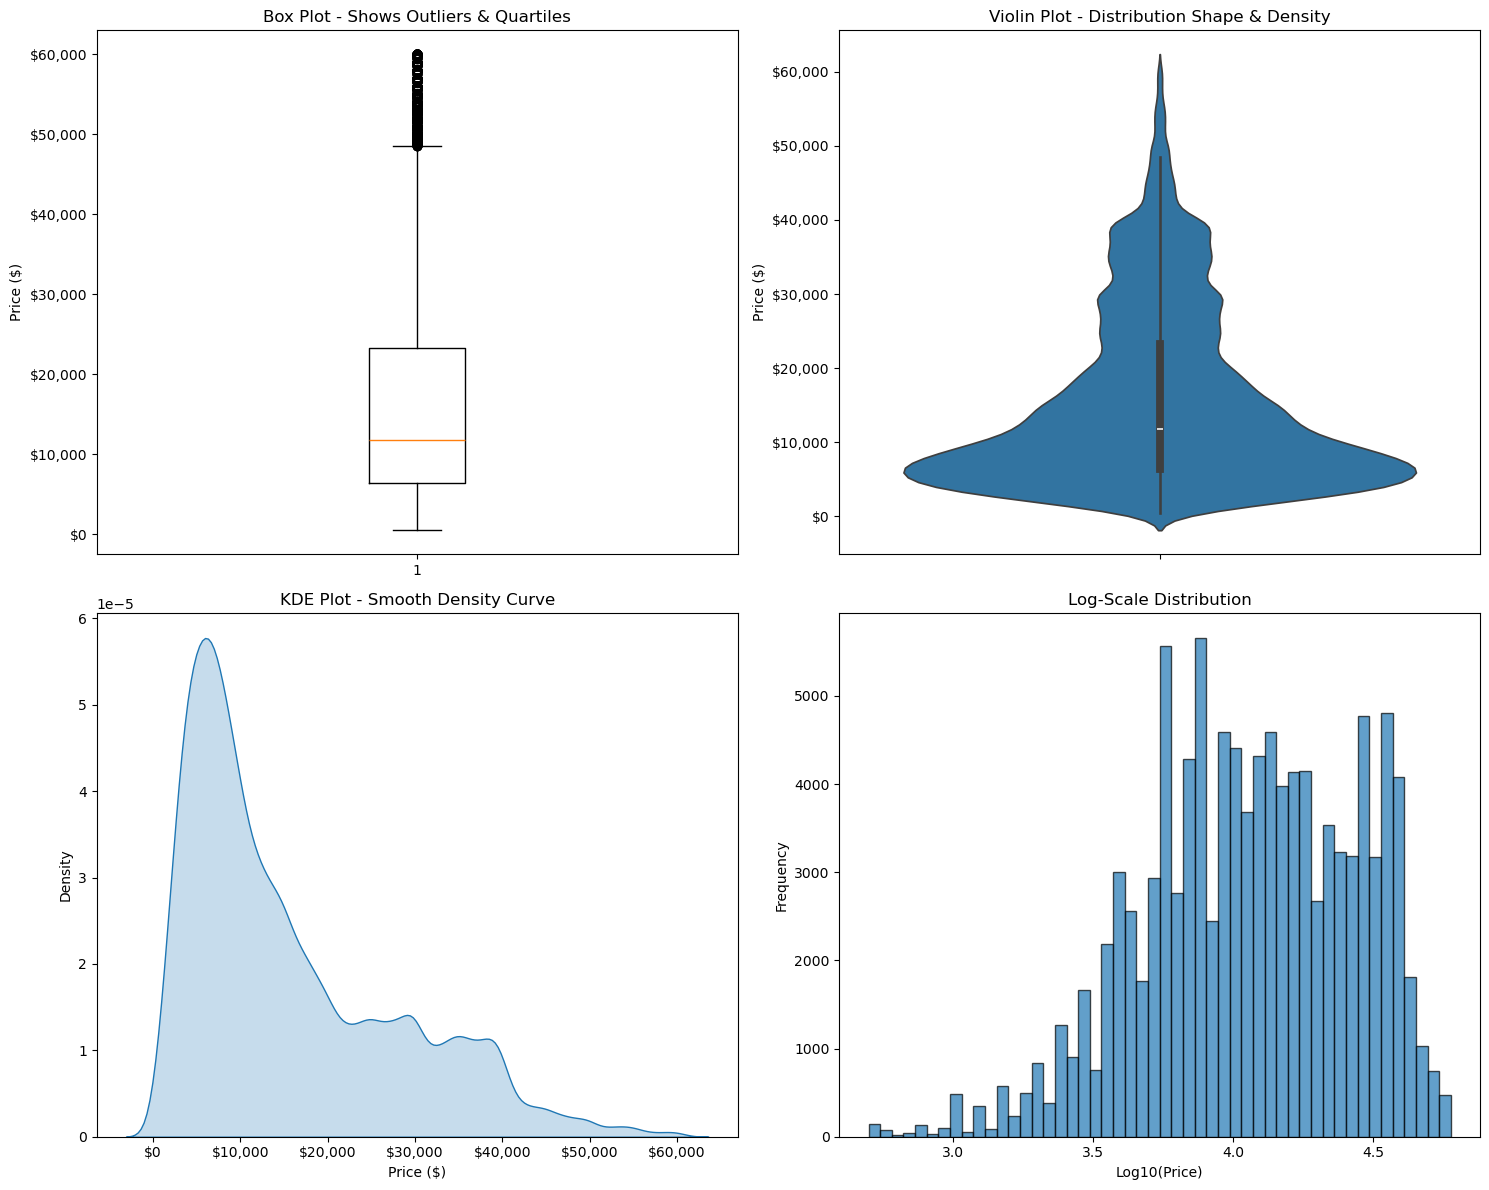


=== PRICE DISTRIBUTION SUMMARY ===
Mean: $15,780.82
Median: $11,800.00
Mode: $4,500.00
Standard Deviation: $12,152.93
Skewness: 1.03
Range: $500.00 - $60,000.00

Recommendation: Box plot is best for identifying outliers, Violin plot shows distribution shape clearly!


In [143]:
# Multiple visualizations for price distribution analysis
print(f"Creating price distribution visualizations for {len(cars_clean_data):,} records...")

sample_data = cars_clean_data['price']

# Create subplots for multiple visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Box Plot - Great for outliers and quartiles
axes[0, 0].boxplot(sample_data, vert=True)
axes[0, 0].set_title('Box Plot - Shows Outliers & Quartiles')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# 2. Violin Plot - Shows distribution shape and density
sns.violinplot(y=sample_data, ax=axes[0, 1])
axes[0, 1].set_title('Violin Plot - Distribution Shape & Density')
axes[0, 1].set_ylabel('Price ($)')
axes[0, 1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# 3. KDE Plot - Smooth density curve
sns.kdeplot(data=sample_data, ax=axes[1, 0], fill=True)
axes[1, 0].set_title('KDE Plot - Smooth Density Curve')
axes[1, 0].set_xlabel('Price ($)')
axes[1, 0].set_ylabel('Density')
axes[1, 0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# 4. Log-scale histogram - Better for skewed data
log_prices = np.log10(sample_data.replace(0, 1))  # Replace 0 with 1 to avoid log(0)
axes[1, 1].hist(log_prices, bins=50, alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Log-Scale Distribution')
axes[1, 1].set_xlabel('Log10(Price)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Summary statistics
print("\n=== PRICE DISTRIBUTION SUMMARY ===")
print(f"Mean: ${sample_data.mean():,.2f}")
print(f"Median: ${sample_data.median():,.2f}")
print(f"Mode: ${sample_data.mode().iloc[0]:,.2f}")
print(f"Standard Deviation: ${sample_data.std():,.2f}")
print(f"Skewness: {sample_data.skew():.2f}")
print(f"Range: ${sample_data.min():,.2f} - ${sample_data.max():,.2f}")

print("\nRecommendation: Box plot is best for identifying outliers, Violin plot shows distribution shape clearly!")

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

## Modeling Strategy

Based on our data exploration and business objective, here's our comprehensive modeling approach:

### **Business Goal**: Predict used car prices and identify key price drivers for dealership inventory decisions

### **Enhanced Feature Engineering Completed**:
✅ **12+ Advanced Features Created** for maximum predictive power:
- **Age Features**: `car_age`, `age_group` (new/recent/mature/vintage)
- **Mileage Features**: `mileage_per_year`, `mileage_level`, `usage_pattern` (well_maintained/high_wear/normal)
- **Brand Features**: `is_luxury`, `brand_tier` (luxury/premium/budget/other), `is_popular_model`
- **Engine Features**: `engine_category` (small/medium/large/electric), `transmission_type`
- **Geographic Features**: `high_cost_area` (CA, NY, MA, CT, NJ, HI, WA, DC)
- **Risk Features**: `has_title_risk`, `condition_score` (1-5 numerical scale)
- **Interaction Features**: `luxury_age_penalty`, `luxury_mileage_penalty`
- **Market Segmentation**: `price_segment` for stratified analysis

### **Modeling Pipeline**:
1. ✅ **Enhanced Feature Engineering** - Comprehensive 12+ feature set created
2. **Data Preprocessing** - StandardScaler + OneHotEncoder pipeline
3. **Multi-Model Training** - 4 algorithms with performance comparison
4. **Feature Importance Analysis** - Identify key business drivers
5. **Model Evaluation** - RMSE, MAE, R² metrics with business interpretation

### **Models to Test**:
- **Linear Regression** (baseline, coefficient interpretation)
- **Ridge Regression** (handles multicollinearity, regularization)
- **Lasso Regression** (automatic feature selection, sparsity)
- **Random Forest** (non-linear relationships, feature importance rankings)

### **Success Metrics & Business Value**:
- **RMSE/MAE** for prediction accuracy (target: <$3,000 error)
- **R²** for explained variance (target: >80% explanation)
- **Feature importance** for actionable dealership insights
- **Price segment analysis** for inventory optimization strategies

In [150]:
# Step 2: Data Preprocessing for Machine Learning with Enhanced Features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

print("=== ENHANCED DATA PREPROCESSING ===")

# Select features for modeling
# Remove non-predictive columns and target variable
features_to_drop = ['price']  # Remove target and derived target
model_features = cars_clean_data.drop(columns=features_to_drop)

# Prepare feature matrix and target variable
X = model_features
y = cars_clean_data['price']

print(f"\n📈 DATASET SUMMARY:")
print(f"Feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")


# Split the cleaned data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"✅ Train set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"✅ Test set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

=== ENHANCED DATA PREPROCESSING ===

📈 DATASET SUMMARY:
Feature matrix shape: (109191, 13)
Target variable shape: (109191,)
✅ Train set: 76,433 samples (70.0%)
✅ Test set: 32,758 samples (30.0%)


In [145]:
cars_clean_data.shape

(109191, 14)

In [146]:
results = []

In [152]:
# Simple Linear Regression Model with proper encoding

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int32', 'float64', 'int64']).columns.tolist()

# Build preprocessing pipeline
preprocessor = ColumnTransformer(
	transformers=[
		('num', StandardScaler(), numerical_cols),
		('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
	]
)

# Build full pipeline
pipeline = Pipeline([
	('preprocessor', preprocessor),
	('regressor', LinearRegression())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict
pred_train = pipeline.predict(X_train)
pred_test = pipeline.predict(X_test)

# Evaluate
train_mse = mean_squared_error(y_train, pred_train)
test_mse = mean_squared_error(y_test, pred_test)
train_r2 = r2_score(y_train, pred_train)
test_r2 = r2_score(y_test, pred_test)

print(f"Train MSE: {train_mse:.2f}, Train R2: {train_r2:.3f}")
print(f"Test MSE: {test_mse:.2f}, Test R2: {test_r2:.3f}")

# Optionally, collect results
reg_results = {
	'model': 'LinearRegression',
	'train_mse': train_mse,
	'test_mse': test_mse,
	'train_r2': train_r2,
	'test_r2': test_r2
}
results.append(reg_results)

results

Train MSE: 27667024.40, Train R2: 0.813
Test MSE: 48475985.49, Test R2: 0.671


[{'model': 'LinearRegression',
  'train_mse': 27667024.397483382,
  'test_mse': 48475985.48765232,
  'train_r2': 0.8128221288003015,
  'test_r2': 0.6711532581647067},
 {'model': 'LinearRegression',
  'train_mse': 27667024.397483382,
  'test_mse': 48475985.48765232,
  'train_r2': 0.8128221288003015,
  'test_r2': 0.6711532581647067}]

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
gscv_linreg = GridSearchCV(
    pipe, 
    param_grid=param_dict
)
# Obtaining predictions
pred_train = gscv_linreg.best_estimator_.predict(X_train[features])
pred_test = gscv_linreg.best_estimator_.predict(X_test[features])

# Evaluating the errors
train_mse = mean_squared_error(y_train, pred_train)
test_mse = mean_squared_error(y_test, pred_test)

train_r2 = r2_score(y_train, pred_train)
test_r2 = r2_score(y_test, pred_test)

# Reporting results for this regression model
reg_results = {
    'model': 'linearRegressionWithPF',
    'train_mse': train_mse,
    'test_mse': test_mse,
    'train_r2': train_r2,
    'test_r2': test_r2
}
results.append(reg_results)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.